# Credit Score Classification

Banks and credit card companies calculate your credit score to determine your creditworthiness. It helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. Today banks and credit card companies use Machine Learning algorithms to classify all the customers in their database based on their credit history. In this project, we will develop a model that calculates credit scores.

<img src="https://www.malatyadan.com/images/haberler/2020/11/kredi-notunu-nasil-artirabilirsiniz.png">

There are three credit scores that banks and credit card companies use to label their customers:

1- Good<br>
2- Standard<br>
3- Poor

<a href="https://thecleverprogrammer.com/2022/12/05/credit-score-classification-with-machine-learning/">You Can Access Data Here</a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [8]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [9]:
d={'Good':2, 'Standard':1, 'Poor':0}

In [10]:
df["Credit_Score"]=df["Credit_Score"].map(d)

<Axes: >

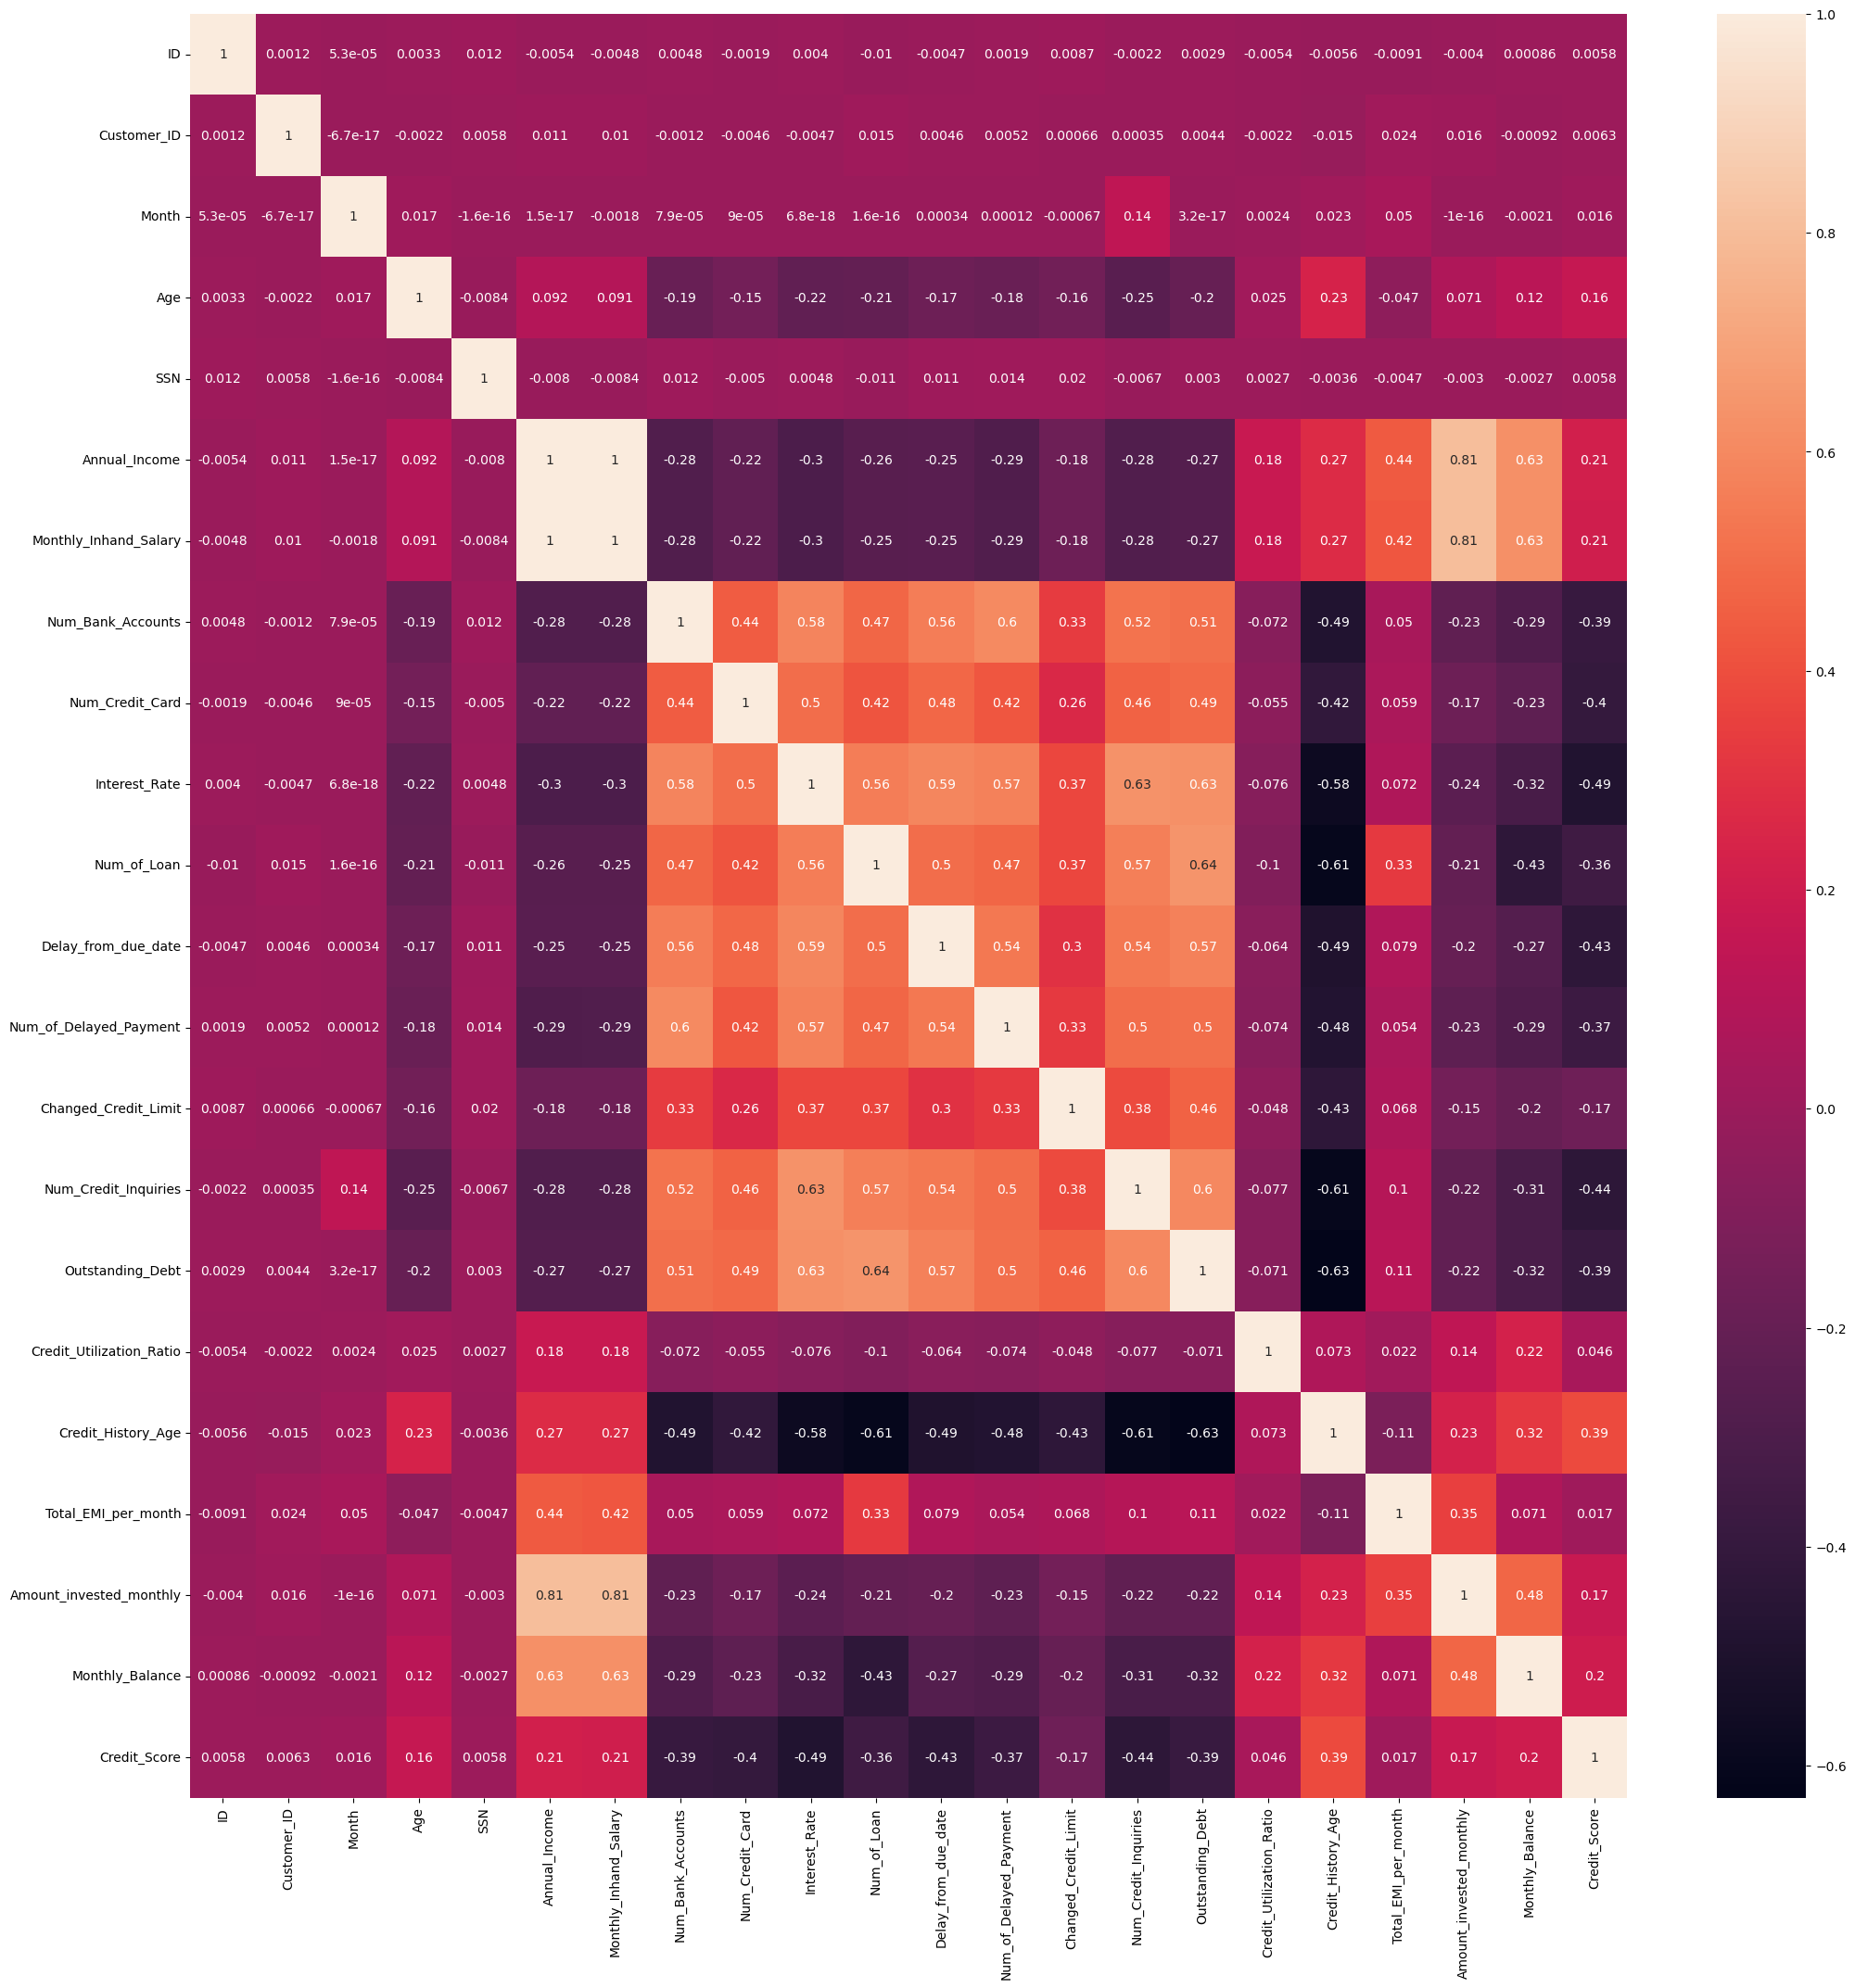

In [11]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True) ,annot=True)

In [12]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
df=df[['Age', 
       'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
        'Credit_History_Age',
       'Payment_of_Min_Amount', 
       'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  float64
 1   Annual_Income            100000 non-null  float64
 2   Num_Bank_Accounts        100000 non-null  float64
 3   Num_Credit_Card          100000 non-null  float64
 4   Interest_Rate            100000 non-null  float64
 5   Num_of_Loan              100000 non-null  float64
 6   Delay_from_due_date      100000 non-null  float64
 7   Num_of_Delayed_Payment   100000 non-null  float64
 8   Num_Credit_Inquiries     100000 non-null  float64
 9   Outstanding_Debt         100000 non-null  float64
 10  Credit_History_Age       100000 non-null  float64
 11  Payment_of_Min_Amount    100000 non-null  object 
 12  Amount_invested_monthly  100000 non-null  float64
 13  Monthly_Balance          100000 non-null  float64
 14  Credi

In [15]:
df["Payment_of_Min_Amount"].unique() 

array(['No', 'NM', 'Yes'], dtype=object)

In [16]:
df["Interest_Rate"].unique() 

array([ 3.,  6.,  8.,  4.,  5., 15.,  7., 12., 20.,  1., 14., 32., 16.,
       17., 10., 31., 25., 18., 19.,  9., 24., 13., 33., 11., 21., 29.,
       28., 30., 23., 34.,  2., 27., 26., 22.])

In [17]:
d2={"Yes":1,"No":2,"NM":0}

In [18]:
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].map(d2)

<Axes: >

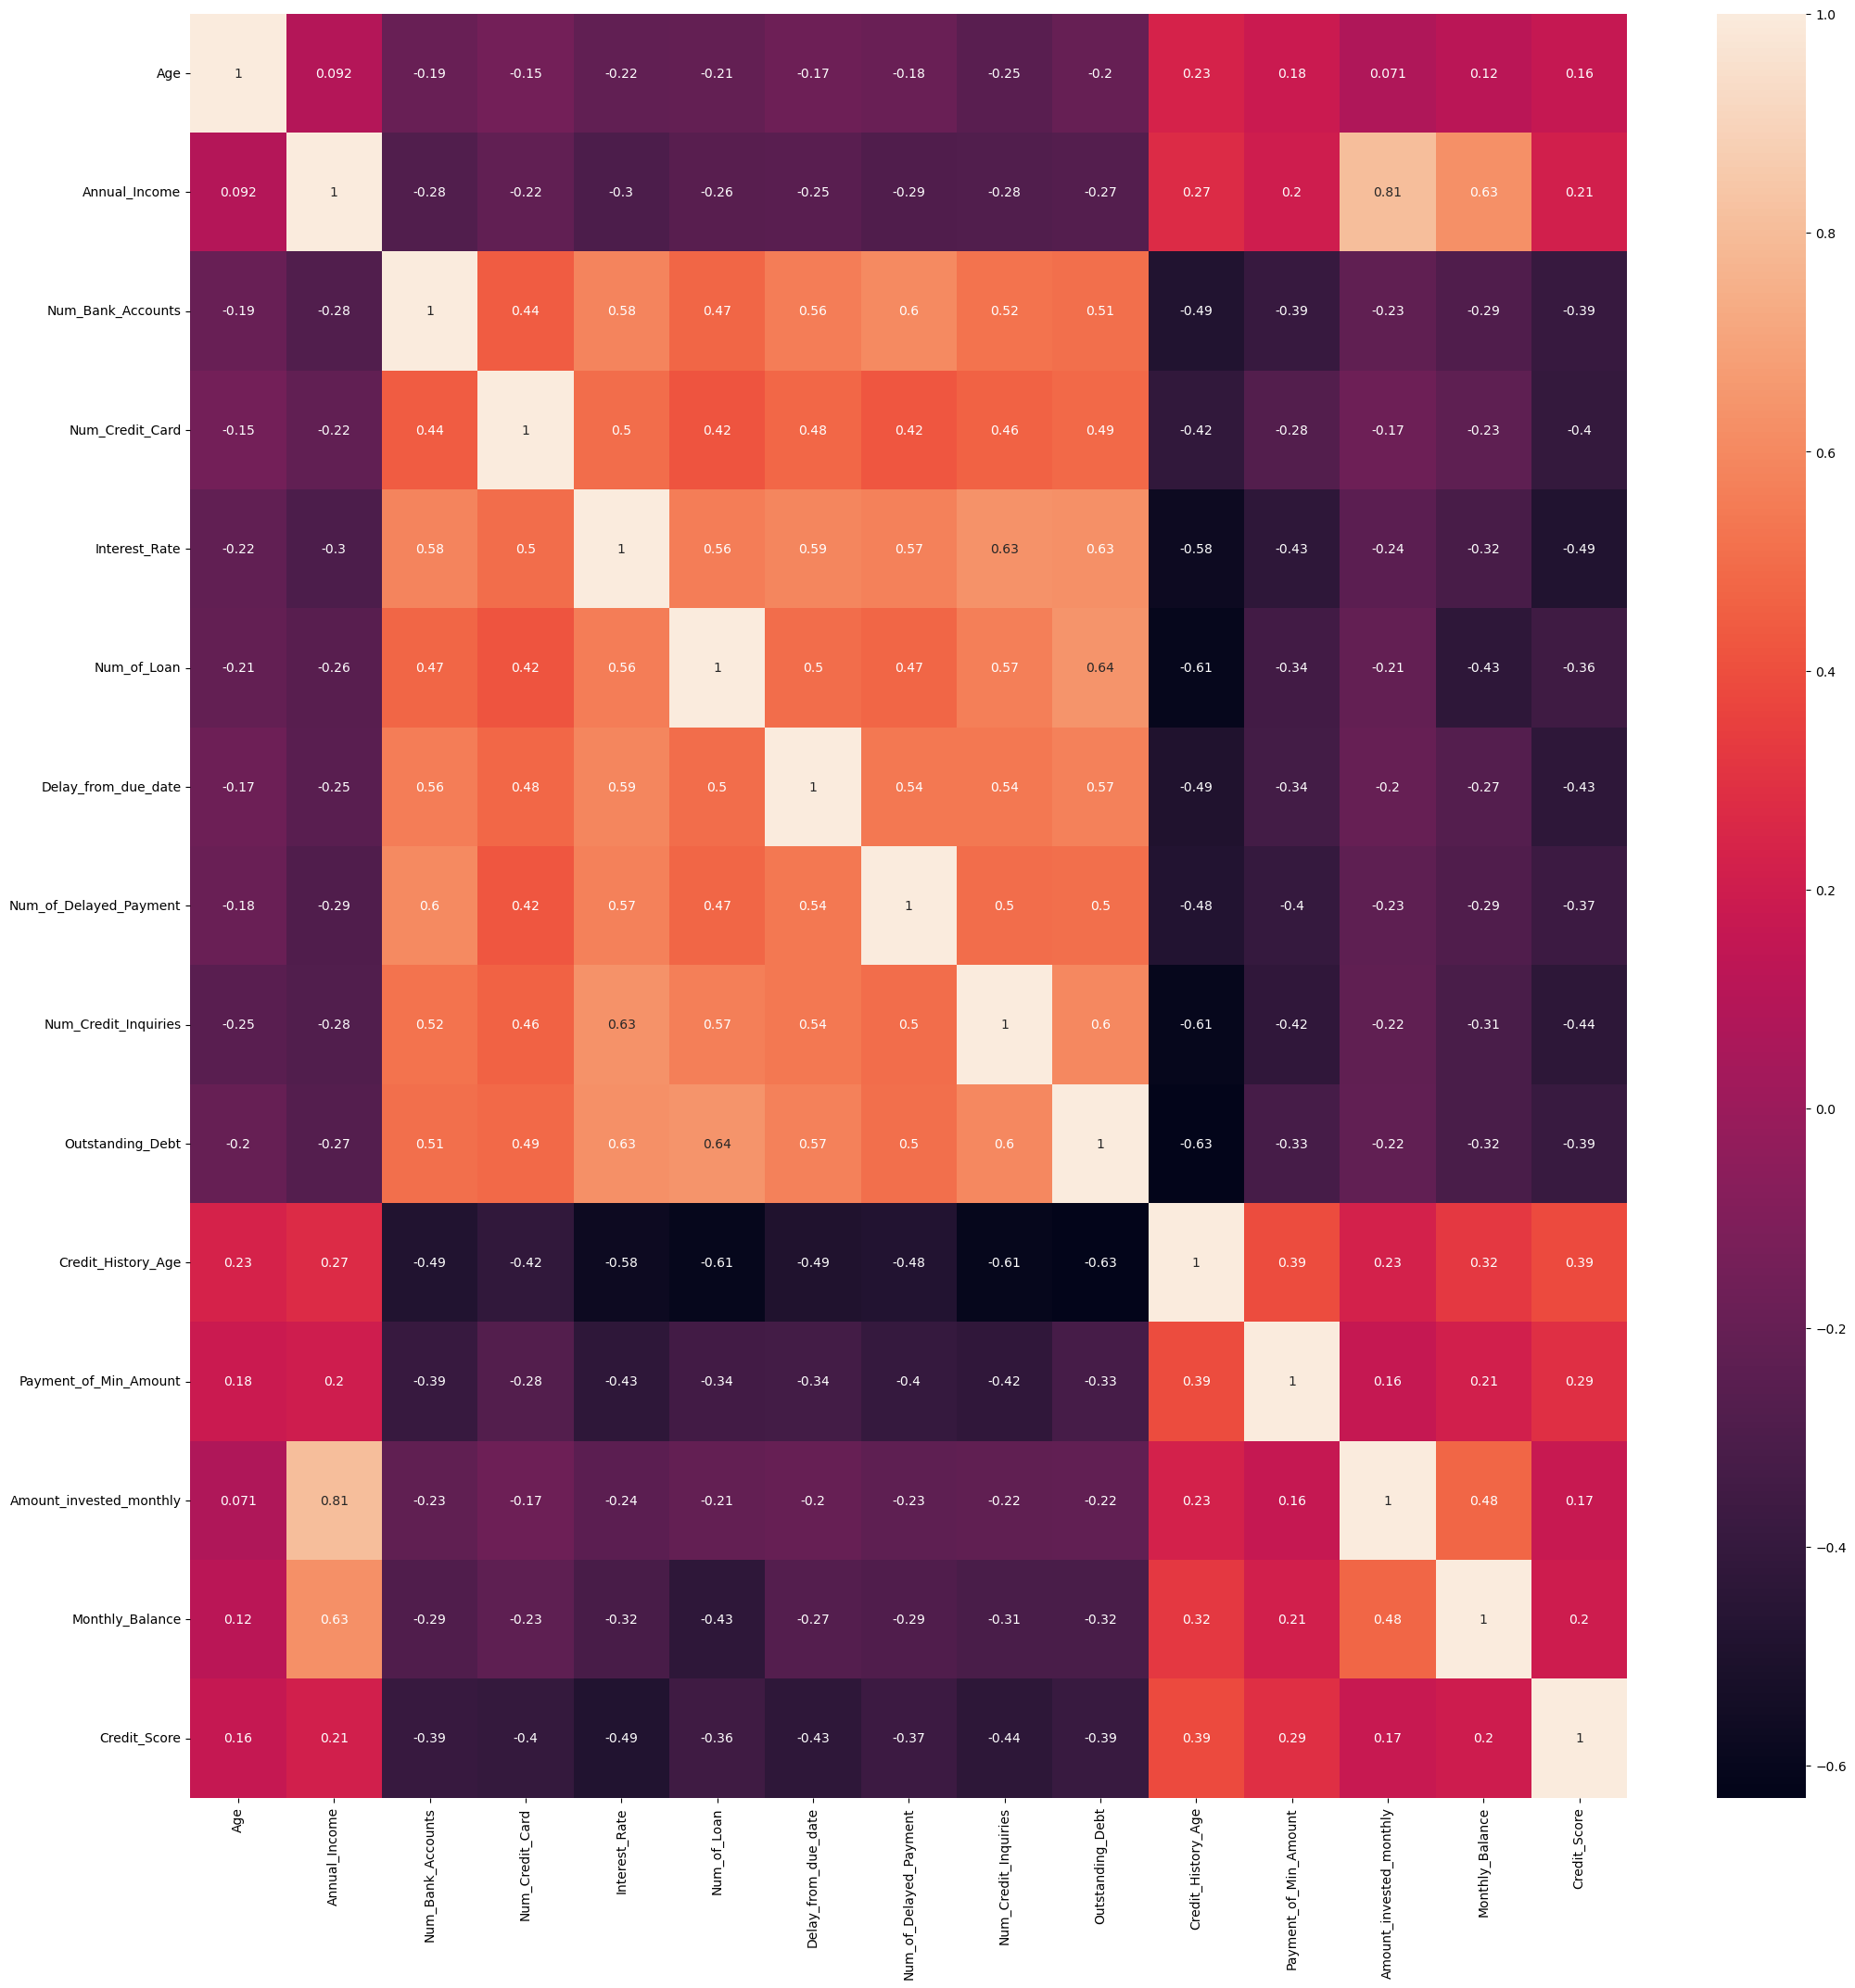

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(numeric_only=True) ,annot=True)

In [20]:
x=df.drop("Credit_Score",axis=1)
y=df["Credit_Score"]
# deep learning için yedek ayırıyorum
xd=df.drop("Credit_Score",axis=1)
yd=df["Credit_Score"]

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression()
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    mlp = MLPClassifier()

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='macro'))
        recall.append(recall_score(y_test, y_pred, average='macro'))
        f1.append(f1_score(y_test, y_pred, average='macro'))

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

In [22]:
algo_test_classification(x,y)

C:\Users\erkan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1
Random Forest,0.80915,0.800604,0.798940,0.799621
XGBoost,0.75820,0.747022,0.735699,0.740894
Decision Tree,0.75625,0.742523,0.740622,0.741555
KNN,0.75230,0.736098,0.730247,0.732576
Gradient Boosting,0.69105,0.674944,0.649575,0.660438
Logistic Regression,0.54290,0.492756,0.399235,0.378822
SVC,0.53285,0.503029,0.376386,0.345874
MLP,0.51610,0.546379,0.610834,0.518133


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [25]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
tahmin=r.predict(x_test)

In [27]:
accuracy_score(tahmin,y_test)

0.80895

In [28]:
confusion_matrix(tahmin,y_test)

array([[4887, 1185,   16],
       [ 965, 8677,  896],
       [  22,  737, 2615]], dtype=int64)

<Axes: >

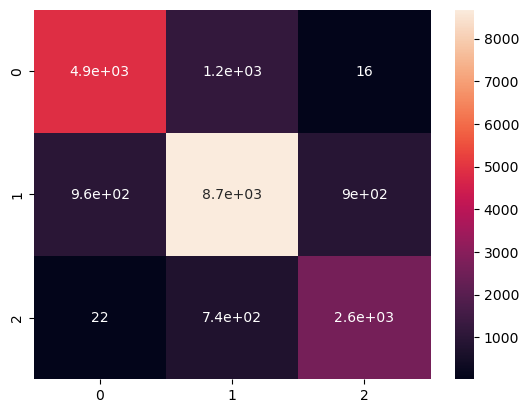

In [29]:
sns.heatmap(confusion_matrix(tahmin,y_test),annot=True)

In [30]:
print(classification_report(tahmin,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      6088
           1       0.82      0.82      0.82     10538
           2       0.74      0.78      0.76      3374

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



In [31]:
x_test.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance
75721,30.0,43391.96,1.0,5.0,10.0,0.0,9.0,6.0,0.0,1468.28,284.0,2,47.438673,554.930282
80184,18.0,14351.21,8.0,7.0,18.0,6.0,18.0,17.0,9.0,4766.87,98.0,1,21.200962,238.314485
19864,41.0,130125.04,5.0,2.0,11.0,2.0,3.0,0.0,3.0,1195.05,191.0,2,103.431653,271.756987
76699,35.0,20107.21,6.0,6.0,32.0,2.0,15.0,13.0,11.0,2544.60,232.0,1,10.917189,359.233914
92991,27.0,92186.19,1.0,2.0,12.0,4.0,1.0,0.0,4.0,809.01,249.0,2,84.280516,697.400557


In [32]:
r.predict(x_test.iloc[:5])  # İlk 5 satırı tahmin et

array([2, 0, 1, 0, 2], dtype=int64)

In [33]:
model=r.fit(x,y)

In [34]:
import pickle

In [35]:
pickle.dump(model,open("credit.pkl","wb")) # Eğittiğimiz modeli kaydediyoruz

### Deep Learning

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(3,activation="softmax")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam : Gradient Descend -> sonuca 
                                                                                                                         #  yaklaştıkça adımları küçültüyor                        

In [48]:
from sklearn.preprocessing import normalize, scale

In [49]:
xd=scale(xd)

In [50]:
history=model.fit(xd,yd,epochs=300,batch_size=23, validation_split=.20, verbose=1) # epochs: Nöronlar areasında kaç kere dolaşacağını göstryr
                                                                             # batc_size: Veriler  büyük olduğu için veriyi eşit parçalara bölüyor
                                                                             # validation_split=.20: Verilerin 80% i eğitim 20% test için ayırıyor 
                                                                             # verbose : Aşağıda yazılar çıkıyor, bize hangi basamakta olduğumuzu söylüyor

Epoch 1/300
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 5s 803us/step - accuracy: 0.6364 - loss: 0.7694 - val_accuracy: 0.6755 - val_loss: 0.7148
Epoch 2/300
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 3s 779us/step - accuracy: 0.6676 - loss: 0.7137 - val_accuracy: 0.6580 - val_loss: 0.7201
Epoch 3/300
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 3s 767us/step - accuracy: 0.6737 - loss: 0.7052 - val_accuracy: 0.6748 - val_loss: 0.7051
Epoch 4/300
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 3s 760us/step - accuracy: 0.6777 - loss: 0.6909 - val_accuracy: 0.6714 - val_loss: 0.7124
Epoch 5/300
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 3s 768us/step - accuracy: 0.6867 - loss: 0.6794 - val_accuracy: 0.6687 - val_loss: 0.7197
Epoch 6/300
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 3s 751us/step - accuracy: 0.6905 - loss: 0.6687 - val_accuracy: 0.6637 - val_loss: 0.7382
Epoch 7/300
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 3s 771us/step - accuracy: 0.6955 - loss: 0.6607 - val_accuracy: 0.6597 - val_loss: 0.7340
Epoch 8/300
3479/3479 ━━━━━━━━━━━━━━━━━━━━ 3s 770us/step - accuracy: 

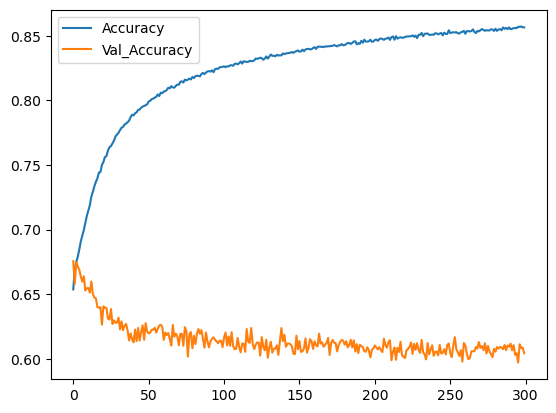

In [51]:
plt.plot(history.history["accuracy"],label="Accuracy")    
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

As a result, we achieved 80% accuracy in Random Forest Classifier and saved our model to make a streamlit application.And 
I got 85% accuracy score in deep learning